In [32]:
import pandas as pd
import re

In [33]:
# Upload the .tsv
FILEPATH = 'train.tsv'
training_df = pd.read_csv(FILEPATH, sep='\t').dropna()

training_df.sample(10)
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 323
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   310 non-null    object
 1   JLMelenchon  310 non-null    object
dtypes: object(2)
memory usage: 7.3+ KB


In [34]:
files = ['CBeaune', 'CZacharopoulou', 'franckriester', 'JLMelenchon', 'MinColonna']

# For cleaning purposes
dataset = {file: '' for file in files}

for file in files:
    with open(file + '.txt', 'r', encoding='utf-8') as src:
        dataset[file] = src.read(-1)
        print("SUBJECT:", file)
        print(dataset[file][:100])

SUBJECT: CBeaune
ts | En cette journée mondiale du #DonDeSang  , rappelons que la majorité a mis fin à une inégalité 
SUBJECT: CZacharopoulou
                           ·  21h            Excellente discussion avec S
E   @IssoufouMhm  , ancien
SUBJECT: franckriester
                  @      ·  Jun 9            « Il y a besoin d’un pays attractif, où les investissem
SUBJECT: JLMelenchon
  Retweeted           L'insoumission      @L_insoumission    ·  1h  « Qu'avez-vous ressenti devant c
SUBJECT: MinColonna
                   @     ·  Jun 10              En #Touraine, avec les candidats de la majorité
 Mer


In [35]:
# Cleaning data and making dataframe
dataset_df = pd.DataFrame(columns=['tweet', 'author', 'label'])

for (i, author) in enumerate(dataset.keys()):
    dataset[author] = re.sub(r'\s{2,}|\|', ' ', dataset[author]).split('views')
    for tweet in dataset[author]:
        dataset_df = dataset_df.append({'tweet': tweet, 'author': author, 'label': i + 1}, ignore_index=True)

dataset_df.sample(10) 

,tweet,author,label
8,"0:24 / 2:13 586 519 1,179 @ · Jun 9 #Egalité ...",CBeaune,1
22,0:01 / 0:31 24 72 Retweeted Élysée @Elysee · ...,CZacharopoulou,2
46,"@ · Jun 10 En #Touraine, avec les candidats d...",MinColonna,5
11,0:00 / 0:56 305 364 692 Retweeted Olivia Greg...,CZacharopoulou,2
19,"0:01 / 5:48 1,156 489 1,954 · May 10 #Afganis...",CZacharopoulou,2
29,0:01 / 1:22 74 442 643 @ · Jun 9 Au coeur des...,franckriester,3
37,"0:01 / 2:13 712 713 1,824 @ · Jun 10 « On nou...",JLMelenchon,4
20,0:01 / 1:11 1:09 18\n1K,CZacharopoulou,2
38,0:00 / 1:11 33 201 587 @ · Jun 10 « Ce dimanc...,JLMelenchon,4
12,0:00 / 0:45 540 361 673 Topics to follow Sign...,CZacharopoulou,2


In [40]:
print(dataset_df.to_dict('record'))

[{'tweet': 'ts   En cette journée mondiale du #DonDeSang , rappelons que la majorité a mis fin à une inégalité en permettant aux homosexuels de donner leur sang, sans condition Un combat pour l’égalité que nous devons poursuivre ! Pour donner votre sang dondesang\nefs\nsante\nfr Accueil Découvrez l’Établissement français du sang, l’opérateur civil unique de la transfusion sanguine en France qui assure une mission de service public essentielle : approvisionner les établissements de 6 39 113 @ · 7h Merci cher @BertrandDelanoe Bertrand Delanoë and Clara Chassaniol 137 378 940 @ · 9h #NUPES   « Il y a des choses qui m’inquiètent Quand C #Mécary parle de « battage médiatique » autour de l’affaire Sarah Halimi, il y a un problème au regard des principes républicains » \u2066 @franceinter \u2069 9,898 ', 'author': 'CBeaune', 'label': 1}, {'tweet': ' 0:01 / 0:23 40 149 343 @ · 9h #Législatives2022   « Toute la journée, on nous dit qu’on ne veut pas débattre de cette élection Moi j’en serais ra

C:\Users\Alejandro Ciuba\AppData\Local\Temp\ipykernel_8024\3284250530.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  print(dataset_df.to_dict('record'))


In [36]:
#Save it as a pickle
dataset_df.to_pickle('dataset_df.pkl')

In [42]:
# Making a training testing split
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   50 non-null     object
 1   author  50 non-null     object
 2   label   50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [66]:
# Make training testing split
import random
def split_assigner():
    return random.choice([1,2,3,4,5]) # 5 = testing

dataset_df['split'] = dataset_df['tweet'].map(lambda x: split_assigner())

dataset_df.head()

,tweet,author,label,split
0,"ts En cette journée mondiale du #DonDeSang ,...",CBeaune,1,5
1,0:01 / 0:23 40 149 343 @ · 9h #Législatives20...,CBeaune,1,2
2,0:00 / 0:09 20 126 321 Topics to follow Sign ...,CBeaune,1,2
3,0:01 / 1:02 47 56 122 @ · 11h Une majorité po...,CBeaune,1,3
4,0:00 / 1:26 21 71 158 Retweeted LCI @LCI · Ju...,CBeaune,1,1


In [67]:
# Get split
train_X, train_y = dataset_df[dataset_df['split'] < 5].tweet, dataset_df[dataset_df['split'] < 5].author
test_X, test_y = dataset_df[dataset_df['split'] == 5].tweet, dataset_df[dataset_df['split'] == 5].author

print(len(test_X))

8


In [50]:
# Necessary Imports
import numpy as np
import pandas as pd
import nltk

# sklearn models, vectorizers, and pipelines
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline

# sklearn loading and splitting
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# sklearn accuracy measurements and displays
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

import os

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [68]:
l1nbmodel = make_pipeline(TfidfVectorizer(max_features=10000, tokenizer=nltk.word_tokenize), SVC(kernel='rbf', C=1E5))
# Train the model
l1nbmodel.fit(train_X, train_y)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000,
                                 tokenizer=<function word_tokenize at 0x000002B04253BDC0>)),
                ('svc', SVC(C=100000.0))])

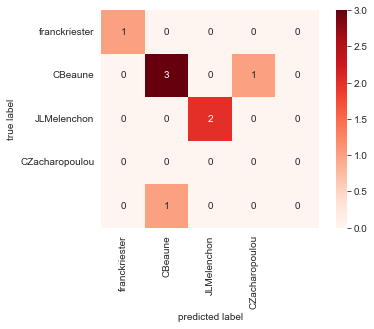

In [69]:
# Confusion matrix heat map
def heat(test_y, pred_y, color='Reds'):
    mat = confusion_matrix(test_y, pred_y)

    sns.heatmap(mat, square=True, annot=True, fmt='d', cmap=color,
                xticklabels=set(test_y), yticklabels= set(test_y))
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()
# Test the model
pred_y = l1nbmodel.predict(test_X)
# Print a heatmap of the confusion matrix
heat(test_y, pred_y)